In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score

In [19]:
data = pd.read_csv('C:\\Users\\Mark\\Wine.csv', sep=",")
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [20]:
data.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [21]:
data.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [91]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,21,13.20,1.78,2.14,11.2,21,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,22,13.16,2.36,2.67,18.6,22,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,33,14.37,1.95,2.50,16.8,33,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,37,13.24,2.59,2.87,21.0,37,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,32,14.20,1.76,2.45,15.2,32,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


C:\Users\Mark\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


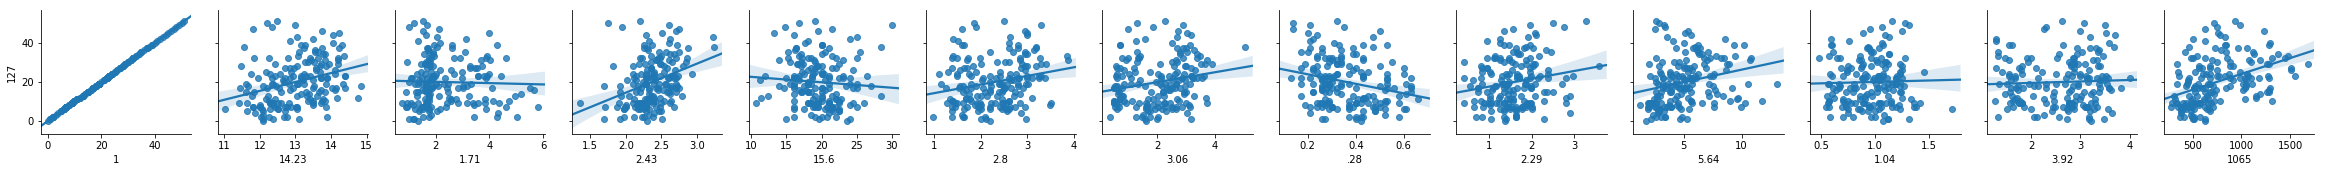

In [92]:
params  = list([i for i in data.columns if i != '127'])
g = sns.pairplot(data, x_vars= params, y_vars=['127'], kind="reg")

In [93]:
data.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,21,13.20,1.78,2.14,11.2,21,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,22,13.16,2.36,2.67,18.6,22,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,33,14.37,1.95,2.50,16.8,33,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,37,13.24,2.59,2.87,21.0,37,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,32,14.20,1.76,2.45,15.2,32,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


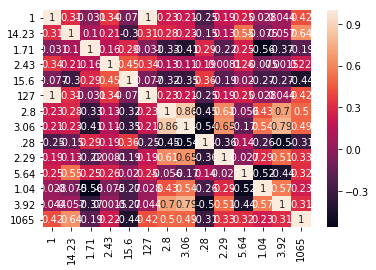

In [94]:
sns.heatmap(data.corr(), annot = True)

In [95]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['127']])

C:\Users\Mark\Python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


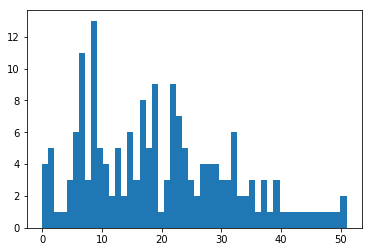

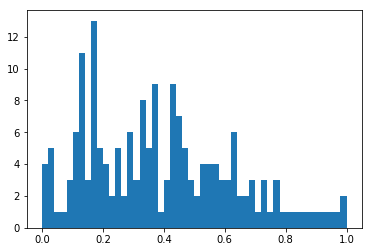

In [96]:
plt.hist(data['127'], 50)
plt.show()
plt.hist(scaled_data, 50)
plt.show()

In [97]:
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(data['127'])
data['1']=encoded
np.unique(data['1'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [98]:
#Данные подготовлены теперь выберем метрики для оценки качества моделей которые будем строить
def target_to_binary(array: np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

Выберем наиболее подходяще модели для решения задачи классификации.
Выберем следующие модели обучения:
Метод k ближайших соседей
SVM
Дерево решений
Случайный лес
Бустинг

In [99]:
#Формируем обучающую и тестовую выборки на основе исходного набора данных.
x_cols = ['14.23','15.6', '3.06', '3.92']
y_col = '127'
x_train, x_test, y_train, y_test = train_test_split(
    data[x_cols], data[y_col],
    test_size=0.5, random_state=1)

In [35]:
x_train.shape, y_train.shape

((88, 4), (88,))

In [36]:
x_test.shape, y_test.shape

((89, 4), (89,))

In [37]:
#Конвертация тестовых значений

bin_y_test = target_to_binary(y_test, 4)

In [38]:
#Метод k ближайших соседей (k = 4)
cl1 = KNeighborsClassifier(n_neighbors=4)
cl1.fit(x_train, y_train)
quality1 = cl1.predict(x_test)

In [39]:
#Конвертация предсказанных признаков
bin_quality1 = target_to_binary(quality1, 4)

In [40]:
bal = balanced_accuracy_score(bin_y_test, bin_quality1)
f1 = f1_score(bin_y_test, bin_quality1)
prc = precision_score(bin_y_test, bin_quality1)
print(bal, f1, prc)

0.5 0.0 0.0


C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
#SVM
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
quality_svm = svm.predict(x_test)

In [42]:
#Конвертация предсказанных признаков
bin_quality_svm = target_to_binary(quality_svm, 4)

In [43]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_svm)
f1 = f1_score(bin_y_test, bin_quality_svm)
prc = precision_score(bin_y_test, bin_quality_svm)
print(bal, f1, prc)

0.5 0.0 0.0


C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
#Дерево решений
decision_tree = DecisionTreeClassifier(random_state=1, max_depth=0.75).fit(x_train, y_train)
quality_dtree = decision_tree.predict(x_test)

In [45]:
#Конвертация предсказанных признаков
bin_quality_dtree = target_to_binary(quality_dtree, 4)

In [46]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_dtree)
f1 = f1_score(bin_y_test, bin_quality_dtree)
prc = precision_score(bin_y_test, bin_quality_dtree)
print(bal, f1, prc)

0.5 0.0 0.0


C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
#Случайный лес
forest = RandomForestClassifier(random_state=1, max_features = 2, n_estimators=100).fit(x_train, y_train)
target_forest = forest.predict(x_test)

In [48]:
bin_target_forest = target_to_binary(target_forest, 4)

In [50]:
bal = balanced_accuracy_score(bin_y_test, bin_target_forest)
f1 = f1_score(bin_y_test, bin_target_forest)
prc = precision_score(bin_y_test,bin_target_forest)
print(bal, prc)

0.5 0.0


C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
#Бустинг
boosting = GradientBoostingClassifier(random_state=1).fit(x_train, y_train)
target_boosting = boosting.predict(x_test)

In [52]:

bin_target_boosting = target_to_binary(target_boosting, 4)

In [54]:
bal = balanced_accuracy_score(bin_y_test, bin_target_boosting)
f1 = f1_score(bin_y_test, bin_target_boosting)
prc = precision_score(bin_y_test,bin_target_boosting)
print(bal, prc)

0.5 0.0


C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mark\Python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
#Подбор гиперпараметров для каждой из моделей
#k ближайших соседей
n_range = np.array(range(2,44,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
         36, 38, 40, 42])}]

In [56]:
k_neigb_search = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', iid=True, return_train_score=True)
k_neigb_search.fit(x_train, y_train)

C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [57]:
k_neigb_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [58]:
k_neigb_search.best_score_

0.125

In [59]:

k_neigb_search.best_params_

{'n_neighbors': 20}

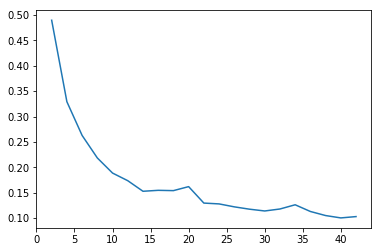

In [60]:
#Изменение качества на обучающей выборке
plt.plot(n_range, k_neigb_search.cv_results_['mean_train_score'])

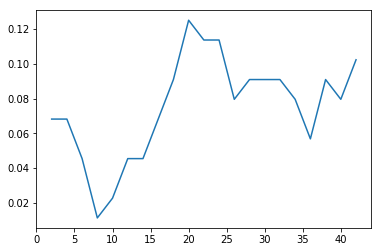

In [61]:
#Изменение качества на тестовой выборке
plt.plot(n_range, k_neigb_search.cv_results_['mean_test_score'])

In [62]:
#SVM
parameters = {'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
svm_search = GridSearchCV(SVC(), parameters, cv=2, scoring='accuracy')
svm_search.fit(x_train, y_train)

C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
svm_search.best_params_

{'gamma': 0.1}

In [64]:
svm_search.best_score_

0.125

In [65]:
#Дерево решений
n_range = np.array(range(1,10,1))
param = [{'max_depth': n_range}]
decision_tree_search = GridSearchCV(DecisionTreeClassifier(), param, cv=2, scoring='accuracy',iid = True)
decision_tree_search.fit(x_train, y_train)

C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
decision_tree_search.best_params_

{'max_depth': 3}

In [67]:
decision_tree_search.best_score_

0.07954545454545454

In [68]:
#Случайный лес
n_range2 = np.array(range(1,5,1))
tuned_parameters2 = [{'max_features': n_range2}]

In [69]:
forest_search = GridSearchCV(RandomForestClassifier(n_estimators=100), tuned_parameters2, cv=KFold(n_splits=10), scoring='accuracy')
forest_search.fit(x_train, y_train)

C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': array([1, 2, 3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
forest_search.best_params_

{'max_features': 1}

In [71]:
forest_search.best_score_

0.045454545454545456

In [72]:
#Бустинг
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              }
estimator_gb = GradientBoostingClassifier(n_estimators = 600)

In [73]:
boost_search = GridSearchCV(estimator_gb,
                               gb_grid_params,
                               cv=2,
                               scoring='accuracy',
                               verbose = 3, 
                               n_jobs=10)
boost_search.fit(x_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   36.6s
[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:  2.8min finished
C:\Users\Mark\Python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [74]:
boost_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:

boost_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 50}

In [76]:
boost_search.best_score_

0.10227272727272728

In [77]:
#Построение решения для выбранных моделей c оптимальными значениями гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
#Метод k ближайших соседей

cl1 = KNeighborsClassifier(n_neighbors=36)
cl1.fit(x_train, y_train)
quality1 = cl1.predict(x_test)

In [79]:
bin_quality1 = (quality1, 4)

In [80]:
bal = balanced_accuracy_score(bin_y_test, bin_quality1)
f1 = f1_score(bin_y_test, bin_quality1)
prc = precision_score(bin_y_test, bin_quality1)
print(bal, f1, prc)

ValueError: Found input variables with inconsistent numbers of samples: [89, 2]

In [81]:
#SVM
svm = SVC(gamma=0.4)
svm.fit(x_train, y_train)
quality_svm = svm.predict(x_test)

In [82]:
bin_quality_svm = convert_target_to_binary(quality_svm, 4)

NameError: name 'convert_target_to_binary' is not defined